# Bắt đầu

1. Định nghĩa vấn đề (Define Problem)

        Mô tả:

Bộ dữ liệu Pima Indians Diabetes được thu thập bởi National Institute of Diabetes and Digestive and Kidney Diseases.

Tập dữ liệu bao gồm thông tin y tế của 768 bệnh nhân nữ từ 21 tuổi trở lên, đều có nguồn gốc Pima Indian.

Mục tiêu của bài toán là dự đoán khả năng mắc bệnh tiểu đường của bệnh nhân dựa trên các thuộc tính y tế.

    Dữ liệu vào (Input Attributes):

Number of times pregnant (Số lần mang thai)

Plasma glucose concentration (Nồng độ glucose trong huyết tương sau 2 giờ)

Diastolic blood pressure (Huyết áp tâm trương - mm Hg)

Triceps skin fold thickness (Độ dày nếp gấp da cánh tay - mm)

2-Hour serum insulin (Insulin huyết thanh sau 2 giờ - mu U/ml)

Body mass index (Chỉ số BMI = cân nặng/chiều cao²)

Diabetes pedigree function (Chỉ số phả hệ tiểu đường)

Age (Tuổi - năm)

    Kết quả (Output / Class variable):

0 = Không mắc tiểu đường

1 = Mắc tiểu đường

##  Phân tích dữ liệu (Analyze Data)
#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [2]:
import pandas as pd

# Đọc dữ liệu
dab = pd.read_csv("diabetes.csv")

# Số dòng và số cột
print("Kích thước dữ liệu:", dab.shape)  

# Kiểu dữ liệu của từng cột
print("\nKiểu dữ liệu của từng cột:")
print(dab.dtypes)

# 5 dòng đầu
print("\n5 dòng đầu:")
print(dab.head())

# 5 dòng cuối
print("\n5 dòng cuối:")
print(dab.tail())

# Thông tin chung về dữ liệu
print("\nThông tin tổng quan:")
print(dab.info())


Kích thước dữ liệu: (768, 9)

Kiểu dữ liệu của từng cột:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

5 dòng đầu:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672

Nhận xét: 

Kích thước dữ liệu: tổng cộng 768 mẫu (rows), số cột 9 thuộc tính (features).Kiểu dữ liệu: gồm 7 cột số nguyên (int64) và 2 cột số thực (float64), toàn bộ dữ liệu đều là dạng số học. Dữ liệu thiếu: một số cột như Glucose, BloodPressure, SkinThickness, Insulin, BMI có nhiều giá trị bằng 0, thực chất đây là dữ liệu thiếu chứ không phải giá trị hợp lệ.
Ý nghĩa cột: Pregnancies (số lần mang thai), Glucose (nồng độ glucose), BloodPressure (huyết áp tâm trương), SkinThickness (độ dày da), Insulin (nồng độ insulin), BMI (chỉ số khối cơ thể), DiabetesPedigreeFunction (chỉ số di truyền), Age (tuổi), Outcome (0 = không mắc, 1 = mắc tiểu đường).Đặc điểm: Outcome là biến mục tiêu dạng nhị phân, dữ liệu phân loại có thể mất cân bằng nên cần kiểm tra thêm.

### Kiểm tra dữ liệu có bị thiếu và các thống kê cơ bản 

In [3]:
# --- Kiểm tra dữ liệu thiếu ---
print("Số lượng giá trị thiếu (missing values) ở mỗi cột:")
print(dab.isnull().sum())

# --- Thống kê mô tả cơ bản ---
print("\nThống kê mô tả cơ bản:")
print(dab.describe())


Số lượng giá trị thiếu (missing values) ở mỗi cột:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Thống kê mô tả cơ bản:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000    

Nhận xét:

Dữ liệu không có missing values theo thống kê nhưng nhiều cột có giá trị bằng 0 bất thường (Glucose, BloodPressure, SkinThickness, Insulin, BMI) cho thấy thực chất đây là giá trị thiếu cần xử lý; giá trị trung bình Glucose ~121 và BMI ~32 phản ánh tình trạng thừa cân/tiền tiểu đường khá rõ; phân phối Outcome mất cân bằng (chỉ ~35% mẫu dương tính tiểu đường); một số thuộc tính có min=0 nhưng max rất cao (ví dụ Insulin max=846) chứng tỏ có nhiều outliers cần xem xét

### 2. Kiểm tra sự tương quan của từng thuộc tính

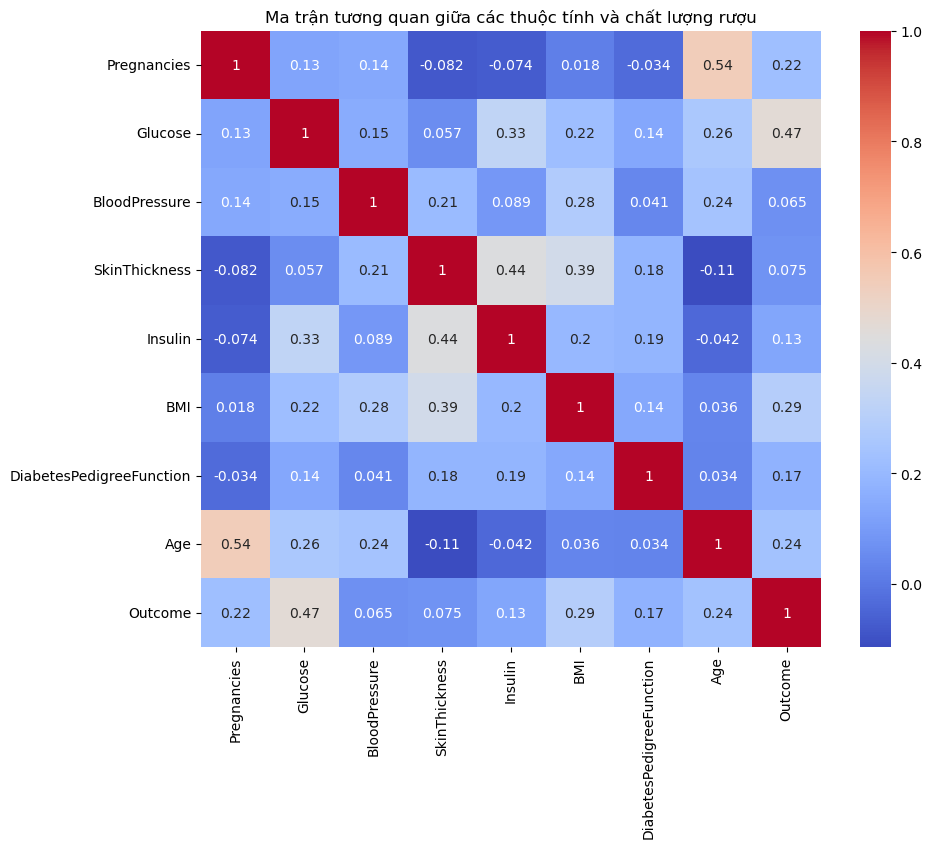

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = dab.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Ma trận tương quan giữa các thuộc tính và chất lượng rượu")
plt.show()


Nhận xét:

Ma trận tương quan cho thấy Outcome có mối quan hệ mạnh nhất với Glucose (0.47), tiếp theo là BMI (0.29), Age (0.24) và Pregnancies (0.22), trong khi các thuộc tính khác có tương quan rất thấp; Pregnancies và Age có tương quan cao (0.54), Insulin và SkinThickness có tương quan đáng kể (0.44), cho thấy có khả năng dư thừa thông tin; nhìn chung các đặc trưng không quá đa cộng tuyến, nhưng nên ưu tiên các đặc trưng Glucose, BMI, Age, Pregnancies cho việc dự đoán Outcome.

### Sử dụng Univariate Feature Selection để chọn các đặc trưng quan trong 

In [6]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Tách X và y
X = dab.drop("Outcome", axis=1)
y = dab["Outcome"]

# Chọn ra 4 thuộc tính quan trọng nhất
selector = SelectKBest(score_func=f_regression, k=4)
X_new = selector.fit_transform(X, y)

# In ra tên cột được chọn
selected_features = X.columns[selector.get_support()]
print("Các thuộc tính chọn:", selected_features.tolist())

Các thuộc tính chọn: ['Pregnancies', 'Glucose', 'BMI', 'Age']


### Chuẩn bị dữ liệu cho trực quan hóa

In [7]:
import pandas as pd

# Đọc dữ liệu
diabetes_data = pd.read_csv("diabetes.csv")

# Giữ lại các cột quan trọng
diabetes_data = diabetes_data[['Pregnancies','Glucose','BMI','Age','Outcome']]

# Xem trước dữ liệu
print(diabetes_data.head())


   Pregnancies  Glucose   BMI  Age  Outcome
0            6      148  33.6   50        1
1            1       85  26.6   31        0
2            8      183  23.3   32        1
3            1       89  28.1   21        0
4            0      137  43.1   33        1


### Trực quan hóa với Matplotlib

2. Trực quan hóa với Matplotlib

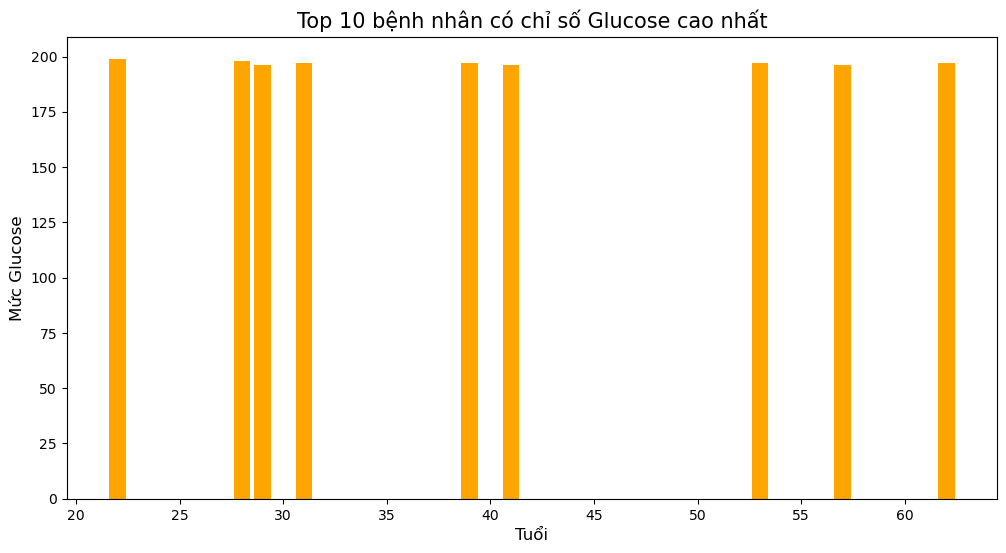

In [8]:
import matplotlib.pyplot as plt

# Sắp xếp theo Glucose giảm dần
diabetes_sorted = diabetes_data.sort_values('Glucose', ascending=False)

# Vẽ bar chart
plt.figure(figsize=(12,6))
x = diabetes_sorted['Age'][0:10]
y = diabetes_sorted['Glucose'][0:10]
plt.bar(x, y, color="orange")

plt.title('Top 10 bệnh nhân có chỉ số Glucose cao nhất', fontsize=15)
plt.xlabel('Tuổi', fontsize=12)
plt.ylabel('Mức Glucose', fontsize=12)
plt.show()


Nhận xét:

Biểu đồ cho thấy 10 bệnh nhân có chỉ số Glucose cao nhất đều đạt mức gần 200, phân bố chủ yếu trong độ tuổi từ 20 đến hơn 60, trong đó tập trung nhiều ở nhóm tuổi 28–32 và 53–62, điều này cho thấy chỉ số Glucose cao không chỉ xảy ra ở một độ tuổi nhất định mà xuất hiện ở nhiều lứa tuổi khác nhau.

Case 2: So sánh song song Glucose và BMI của 10 bệnh nhân

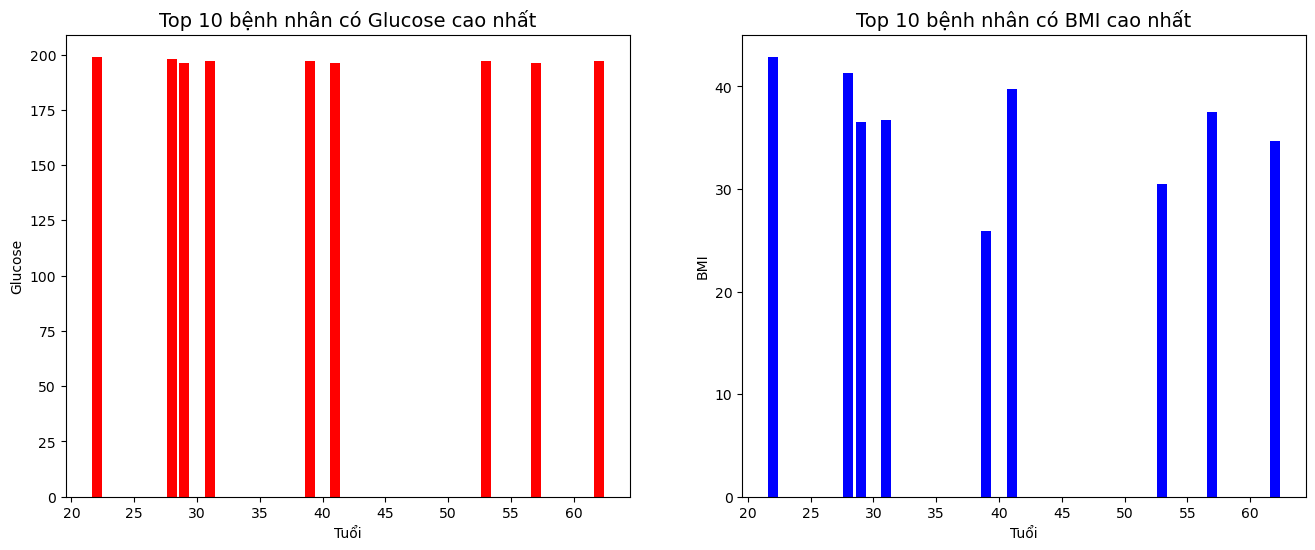

In [9]:
# Vẽ 2 subplot song song
fig, ax = plt.subplots(1,2, figsize=(16,6))

x = diabetes_sorted['Age'][0:10]
y1 = diabetes_sorted['Glucose'][0:10]
y2 = diabetes_sorted['BMI'][0:10]

# Glucose
ax[0].bar(x, y1, color="red")
ax[0].set_title("Top 10 bệnh nhân có Glucose cao nhất", fontsize=14)
ax[0].set_xlabel("Tuổi")
ax[0].set_ylabel("Glucose")

# BMI
ax[1].bar(x, y2, color="blue")
ax[1].set_title("Top 10 bệnh nhân có BMI cao nhất", fontsize=14)
ax[1].set_xlabel("Tuổi")
ax[1].set_ylabel("BMI")

plt.show()


Nhận xét:

Biểu đồ bên trái: top 10 bệnh nhân có Glucose cao nhất tập trung chủ yếu ở mức gần 200 mg/dL, độ tuổi trải đều từ khoảng 21 đến 62 tuổi, không có xu hướng rõ ràng theo tuổi; Biểu đồ bên phải: top 10 bệnh nhân có BMI cao nhất dao động từ khoảng 26 đến 43, độ tuổi trải rộng từ khoảng 22 đến 62 tuổi, có một vài bệnh nhân trẻ nhưng BMI vẫn cao.

## Trực quan hóa với Seaborn

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26060\1122709711.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Age', y='Glucose', palette="Set2")


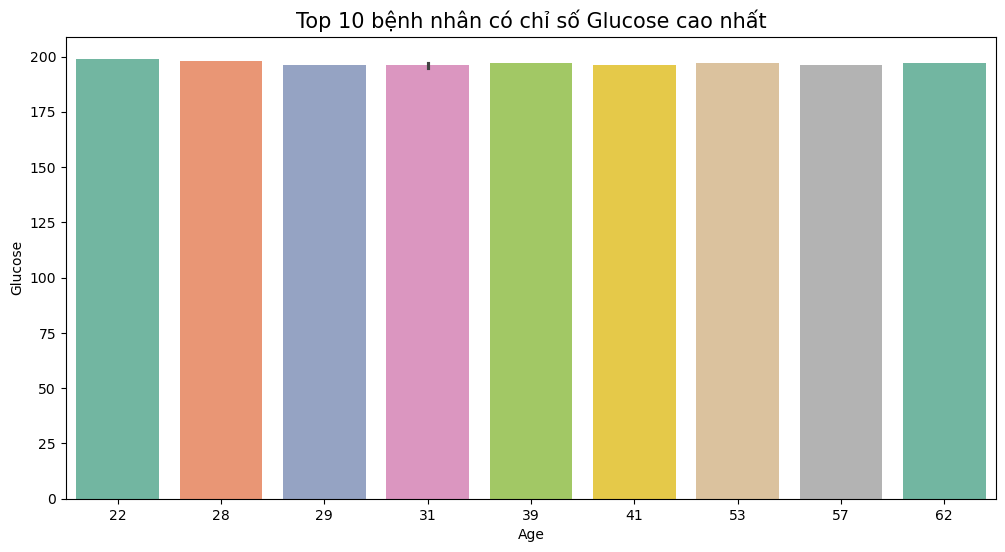

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26060\1122709711.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Glucose", data=diabetes_data, palette="Set1")


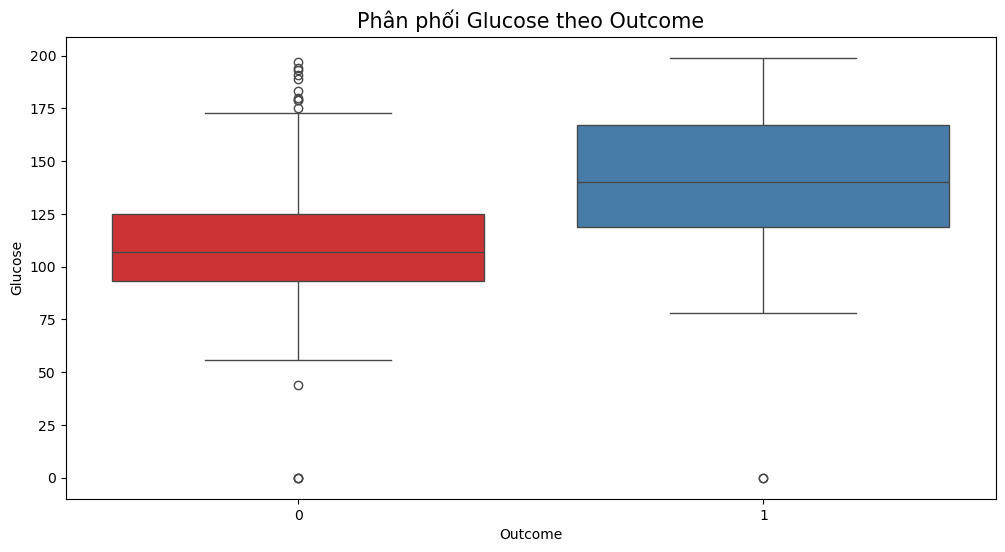

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26060\1122709711.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="BMI", data=diabetes_data, palette="Set3")


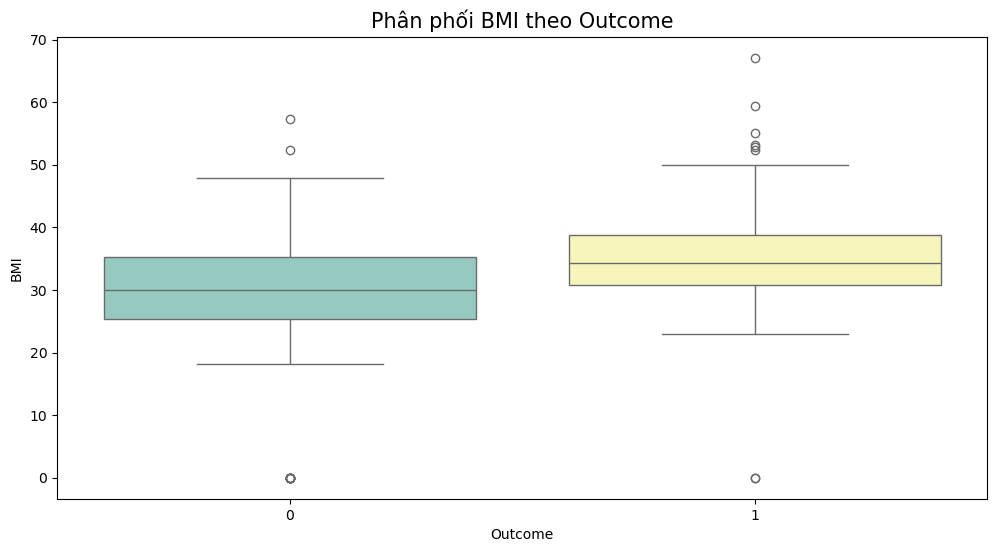

In [10]:
import seaborn as sns

# Case 1: Barplot cơ bản
plt.figure(figsize=(12,6))
data = diabetes_sorted[0:10]
sns.barplot(data=data, x='Age', y='Glucose', palette="Set2")
plt.title('Top 10 bệnh nhân có chỉ số Glucose cao nhất', fontsize=15)
plt.show()

# Case 2: So sánh Glucose và BMI theo Outcome (0 = không bệnh, 1 = bệnh)
plt.figure(figsize=(12,6))
sns.boxplot(x="Outcome", y="Glucose", data=diabetes_data, palette="Set1")
plt.title("Phân phối Glucose theo Outcome", fontsize=15)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="Outcome", y="BMI", data=diabetes_data, palette="Set3")
plt.title("Phân phối BMI theo Outcome", fontsize=15)
plt.show()


Nhận xét biểu đồ thể hiện top 10 bệnh nhân có chỉ số Glucose cao nhất, được sắp xếp và gắn nhãn theo độ tuổi. Nhóm tuổi từ 22 đến 62 đều có chỉ số Glucose rất cao, vượt ngưỡng 125 mg/dL. Đặc biệt, bệnh nhân 62 tuổi có chỉ số cao nhất (khoảng 200 mg/dL), tiếp theo là bệnh nhân 57 tuổi (khoảng 175 mg/dL). Điều này cho thấy chỉ số Glucose có xu hướng tăng cao ở nhóm bệnh nhân lớn tuổi hơn trong top 10 này, nhưng vẫn có những trường hợp trẻ tuổi (22, 28 tuổi) cũng nằm trong nhóm có mức Glucose cao bất thường.

Nhận xét iểu đồ boxplot so sánh phân phối chỉ số Glucose giữa hai nhóm Outcome. Nhóm Outcome = 1 (có bệnh) có chỉ số Glucose trung bình cao hơn rõ rệt so với nhóm Outcome = 0 (không có bệnh). Phân vị thấp nhất (đáy hộp) của nhóm có bệnh cũng cao hơn đáng kể so với phân vị cao nhất (đỉnh hộp) của nhóm không bệnh, cho thấy Glucose là một chỉ số phân biệt rất mạnh và có giá trị dự đoán cao giữa hai nhóm đối tượng.

Nhận xét biểu đồ boxplot so sánh phân phối chỉ số BMI giữa hai nhóm Outcome. Nhóm Outcome = 1 (có bệnh) có chỉ số BMI trung vị cao hơn nhóm Outcome = 0 (không bệnh). Phạm vi phân bố BMI của nhóm có bệnh cũng rộng hơn và nằm ở vị trí cao hơn, cho thấy xu hướng những người có BMI cao sẽ có nguy cơ mắc bệnh cao hơn. Tuy nhiên, sự khác biệt giữa hai nhóm không quá lớn như chỉ số Glucose.

# Thực hiện EDA trên tập dữ liệu mua sắm tại siêu thị.

Online Retail.xlsx là một tập dữ liệu bán lẻ trực tuyến thường được dùng trong học tập và nghiên cứu về khai phá dữ liệu, phân tích khách hàng và xây dựng mô hình dự đoán.Phân tích hành vi khách hàng: tìm khách hàng tiềm năng, phân khúc khách hàng (RFM analysis). Phân tích giỏ hàng: tìm các sản phẩm hay mua kèm nhau (market basket analysis – luật kết hợp). Phân tích kinh doanh: doanh thu theo thời gian, quốc gia, sản phẩm. Dự báo: dự đoán doanh số bán hàng hoặc nhu cầu theo mùa.
 
    Input:

InvoiceNo: Mã hóa đơn (mỗi hóa đơn có thể chứa nhiều sản phẩm).

StockCode: Mã sản phẩm.

Description: Mô tả sản phẩm.

Quantity: Số lượng sản phẩm được mua/bán.

InvoiceDate: Ngày giờ phát sinh giao dịch.

UnitPrice: Giá đơn vị (giá của một sản phẩm).

CustomerID: Mã khách hàng (ẩn danh).

Country: Quốc gia của khách hàng.

    Output:

Là thông tin rút ra để hỗ trợ quyết định kinh doanh


## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [2]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

### 2.2. Nạp dữ liệu (Load Dataset)

In [6]:
import pandas as pd

# Đường dẫn tới file
data_path = "Online Retail.xlsx"

# Tên cột trong dữ liệu Online Retail
data_names = [
    "InvoiceNo",    # mã hóa đơn
    "StockCode",    # mã sản phẩm
    "Description",  # mô tả sản phẩm
    "Quantity",     # số lượng
    "InvoiceDate",  # ngày lập hóa đơn
    "UnitPrice",    # đơn giá
    "CustomerID",   # mã khách hàng
    "Country"       # quốc gia
]

# Đọc dữ liệu từ file Excel
df_retail = pd.read_excel(data_path, names=data_names, header=0)

# Hiển thị 5 dòng đầu tiên
print(df_retail.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [8]:
# shape
print(f'+ Shape: {df_retail.shape}')
# types
print(f'+ Data Types: \n{df_retail.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df_retail.head(5))
display.display(df_retail.tail(5))
# info
df_retail.info()

+ Shape: (541909, 8)
+ Data Types: 
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
+ Contents: 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Nhận xét ##

Bộ dữ liệu có kích thước (541909, 8), gồm 541909 dòng và 8 cột, các cột bao gồm cả dữ liệu dạng object, số nguyên, số thực và thời gian, trong đó cột Description có 1454 giá trị thiếu và cột CustomerID có khoảng 135080 giá trị thiếu, dữ liệu chủ yếu mô tả các giao dịch bán hàng với thông tin mã hóa đơn, mã sản phẩm, mô tả sản phẩm, số lượng, thời gian mua, giá đơn vị, mã khách hàng và quốc gia, dung lượng bộ nhớ khoảng 33.1 MB.

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [12]:
import pandas as pd
from IPython import display

# Kiểm tra tính toàn vẹn dữ liệu
has_null = df_retail.isnull().sum().any() 
has_nan  = df_retail.isna().sum().any()   # not a number
n_duplicated = df_retail.duplicated().sum()  # số dòng trùng lặp

print("Tính toàn vẹn dữ liệu:")
print(f"+ Có giá trị Null: {has_null}")

if has_null:
    display.display(df_retail[df_retail.isnull().any(axis=1)])

print(f"+ Có giá trị NaN: {has_nan}")

if has_nan:
    display.display(df_retail[df_retail.isna().any(axis=1)])

print(f"+ Số dòng trùng: {n_duplicated}")

if n_duplicated > 0:
    print("\n→ Các dòng bị trùng:")
    dup_rows = df_retail[df_retail.duplicated(keep=False)]
    display.display(dup_rows)


Tính toàn vẹn dữ liệu:
+ Có giá trị Null: True


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


+ Có giá trị NaN: True


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


+ Số dòng trùng: 5268

→ Các dòng bị trùng:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


## Nhận xét ##

Kết quả kiểm tra cho thấy dữ liệu có tồn tại giá trị Null/NaN chủ yếu ở cột Description và CustomerID, ngoài ra còn có các dòng trùng lặp với số lượng đáng kể, điều này ảnh hưởng đến tính toàn vẹn dữ liệu, do đó cần thực hiện xử lý như loại bỏ hoặc điền giá trị thay thế để đảm bảo chất lượng dữ liệu trước khi phân tích.

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [14]:
description = df_retail.describe()
display.display(description)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## Nhận xét ## 

Cột Quantity có giá trị trung bình khoảng 9.55 nhưng tồn tại giá trị âm rất lớn (-80995) và dương cực lớn (80995) cho thấy dữ liệu có ngoại lệ, phần lớn phân phối tập trung ở khoảng từ 1 đến 10; Cột InvoiceDate trải dài từ 01/12/2010 đến 09/12/2011 cho thấy dữ liệu ghi nhận trong 1 năm; Cột UnitPrice có giá trị trung bình khoảng 4.61 nhưng cũng tồn tại ngoại lệ âm (-11062.06) và dương rất cao (38970) so với khoảng giá phổ biến từ 1.25 đến 4.13; Cột CustomerID có 406,829 giá trị hợp lệ, trung bình khoảng 15287, nằm trong khoảng từ 12346 đến 18287, thể hiện sự phân bổ tương đối đồng đều nhưng vẫn có khoảng thiếu dữ liệu đáng kể.




#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

Đây không phải bài toán phân lớp

#### (5) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả. 

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn. 

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

In [17]:
corr = df_retail.corr(method='pearson', numeric_only=True) # dataframe có kiểu String 
display.display(corr)


,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


**Nhận xét**:

Ma trận tương quan cho thấy các biến trong df_retail gần như không có mối quan hệ tuyến tính với nhau, cụ thể Quantity và UnitPrice có tương quan rất yếu và âm (-0.0012), Quantity và CustomerID cũng gần như không liên hệ (-0.0036), tương tự UnitPrice và CustomerID (-0.0046), do đó các biến số trong dữ liệu này gần như độc lập, không ảnh hưởng tuyến tính lẫn nhau.

### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

    **Box and whisker plots**
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

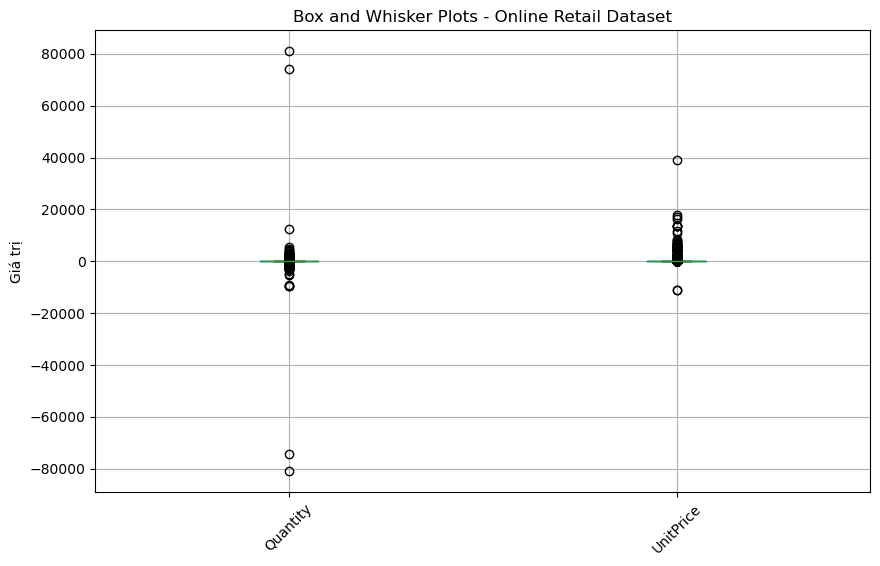

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu Online Retail
data_path = "Online Retail.xlsx"
col_names = [
    "InvoiceNo", "StockCode", "Description", "Quantity", 
    "InvoiceDate", "UnitPrice", "CustomerID", "Country"
]
df_retail = pd.read_excel(data_path, names=col_names, header=0)

# Chọn các cột số để vẽ boxplot
numeric_cols = ["Quantity", "UnitPrice"]

plt.figure(figsize=(10,6))
df_retail[numeric_cols].boxplot()
plt.title("Box and Whisker Plots - Online Retail Dataset")
plt.ylabel("Giá trị")
plt.xticks(rotation=45)
plt.show()


**Nhận xét**:

Biểu đồ này hiển thị hai boxplot cho hai cột 'Quantity' (Số lượng) và 'UnitPrice' (Đơn giá) từ dataset Bán lẻ trực tuyến. Cả hai biến đều có phân phối lệch phải mạnh, với rất nhiều điểm outliers ở phía trên, đặc biệt là ở biến 'UnitPrice'. Điều này cho thấy đa phần các giao dịch có số lượng và đơn giá thấp, chỉ có một số ít giao dịch có giá trị hoặc số lượng rất cao

**Biểu đồ Histogram**

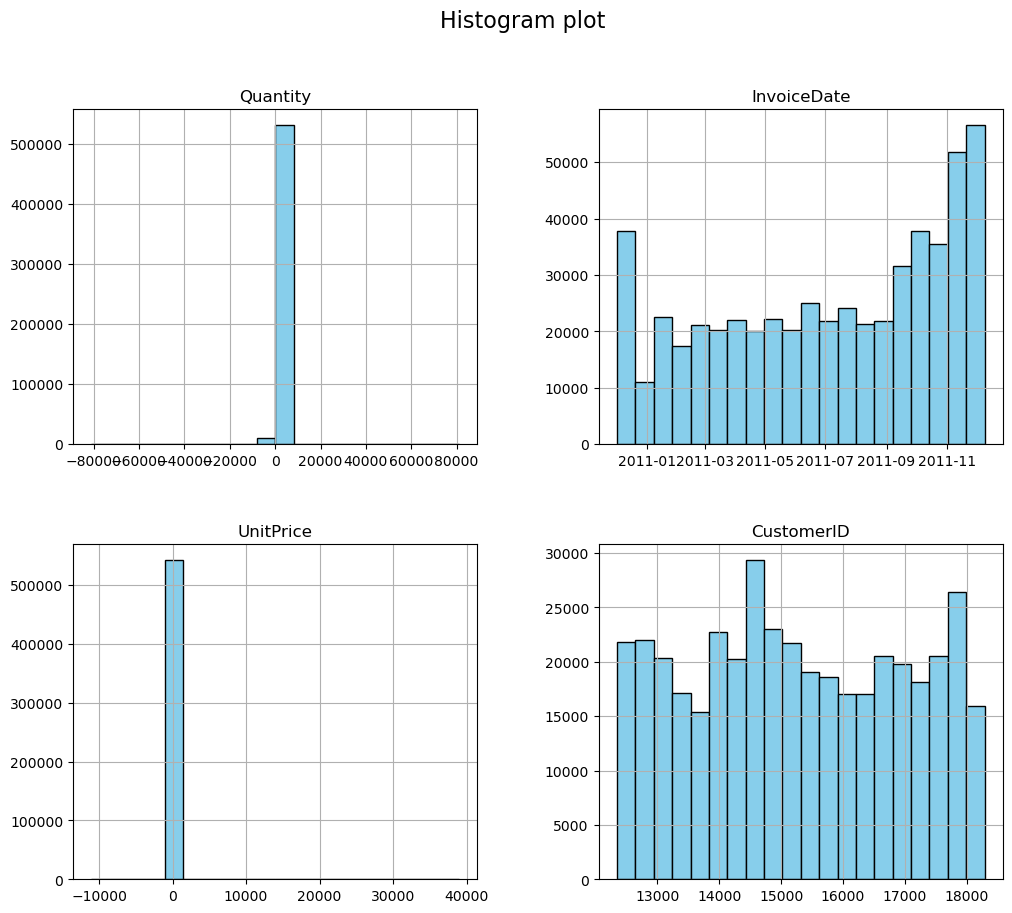

In [21]:

df_retail.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histogram plot", fontsize=16)
plt.show()


## Nhận xét :

Biểu đồ histogram thể hiện phân phối của 4 thuộc tính trong dataset Bán lẻ. Phân phối của 'Quantity' và 'UnitPrice' cực kỳ lệch phải, với phần lớn giá trị tập trung gần 0 và một số ít giá trị rất lớn ở xa. 'InvoiceDate' cho thấy dữ liệu được thu thập chủ yếu trong năm 2011, với tần suất giao dịch tăng dần và đạt đỉnh vào cuối năm. 'CustomerID' có phân phối tương đối đồng đều, cho thấy dữ liệu khách hàng được phân bố khá cân bằng trong khoảng từ 13000 đến 18000.

#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

<Figure size 1200x1200 with 0 Axes>

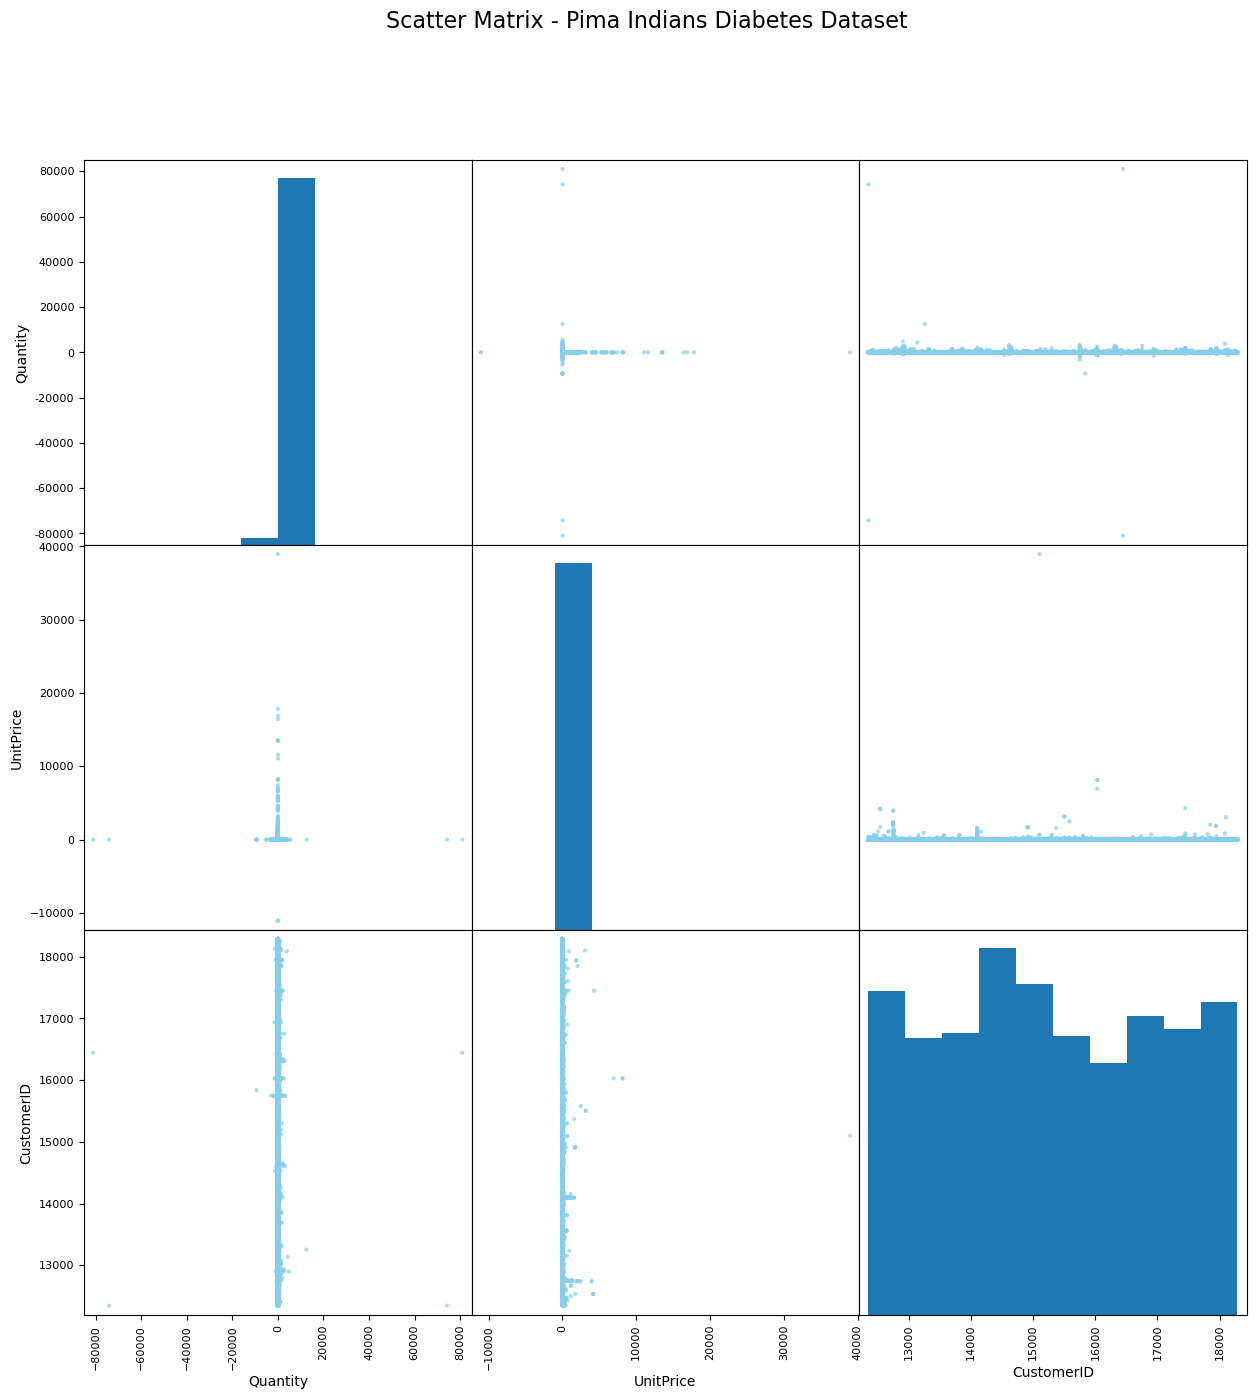

In [22]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
# Vẽ Scatter Matrix
plt.figure(figsize=(12, 12))
scatter_matrix(df_retail, figsize=(15, 15), diagonal='hist', alpha=0.7, color="skyblue")
plt.suptitle("Scatter Matrix - Pima Indians Diabetes Dataset", fontsize=16)
plt.show()

### Nhận xét:

Phân phối: Quantity và UnitPrice tập trung mạnh ở giá trị nhỏ, đuôi rất dài; xuất hiện nhiều giá trị âm và ngoại lệ cực lớn. CustomerID gần như đều vì chỉ là mã định danh. Quan hệ giữa biến: Không thấy tương quan tuyến tính rõ giữa Quantity và UnitPrice. Các ô liên quan CustomerID tạo các “vệt” dọc/ngang, không mang ý nghĩa phân tích. Vấn đề dữ liệu: Giá/SL âm và ngoại lệ rất lớn gợi ý lỗi nhập liệu/hoàn trả. Thang trục quá rộng làm loãng cấu trúc chính. Tiêu đề “Pima Indians Diabetes Dataset” có vẻ không khớp với các biến hiển thị.

<Figure size 1200x1200 with 0 Axes>

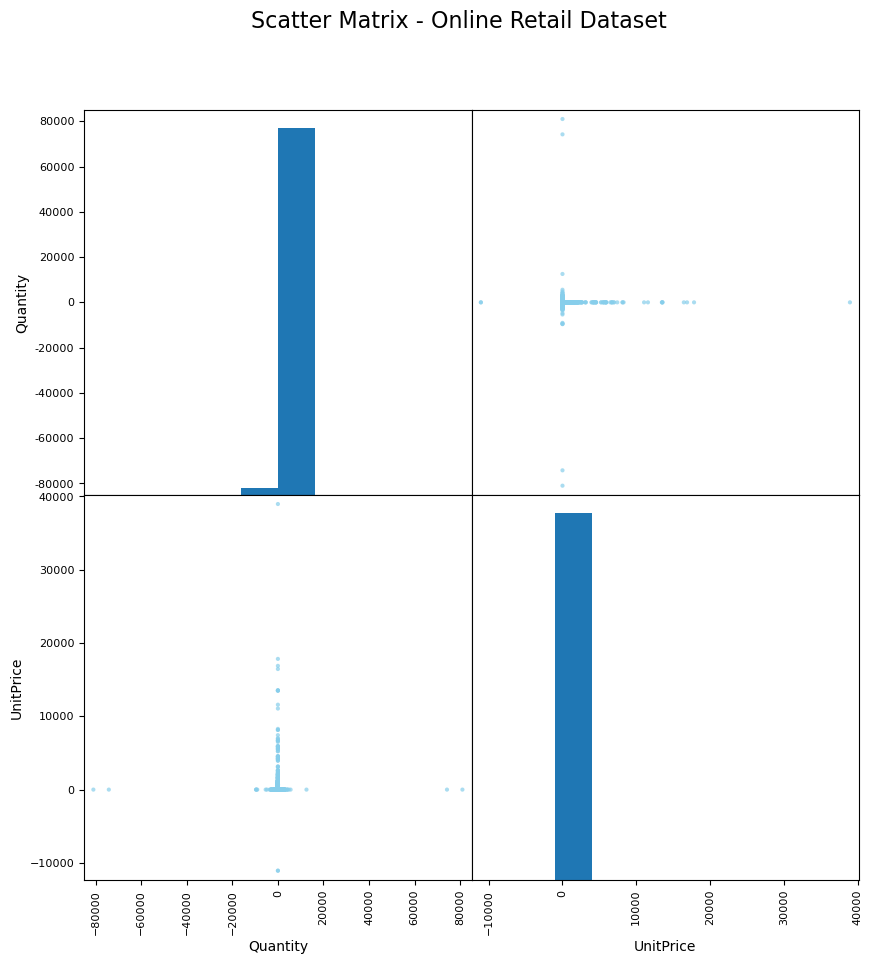

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Đọc dữ liệu Online Retail
data_path = "Online Retail.xlsx"
col_names = [
    "InvoiceNo", "StockCode", "Description", "Quantity", 
    "InvoiceDate", "UnitPrice", "CustomerID", "Country"
]
df_retail = pd.read_excel(data_path, names=col_names, header=0)

# Chọn các cột số để vẽ scatter matrix
numeric_cols = ["Quantity", "UnitPrice"]

plt.figure(figsize=(12, 12))
scatter_matrix(df_retail[numeric_cols], figsize=(10, 10), diagonal='hist', alpha=0.7, color="skyblue")
plt.suptitle("Scatter Matrix - Online Retail Dataset", fontsize=16)
plt.show()


## Nhận xét: 

Mối quan hệ giữa các biến: biểu đồ cho thấy sự phân bố và mối quan hệ giữa Quantity và UnitPrice. Dữ liệu ngoại lai: có nhiều giá trị bất thường trong cả hai biến, đặc biệt là Quantity với một số điểm rất cao. Phân phối biến: phần lớn giá trị của Quantity tập trung ở mức thấp, trong khi UnitPrice có nhiều điểm giá trị âm, điều này cần được kiểm tra. Sự tương quan: có thể có một mối quan hệ nhất định giữa Quantity và UnitPrice, nhưng cần xem xét kỹ lưỡng do sự hiện diện của dữ liệu ngoại lai. Kích thước biểu đồ: lớn giúp dễ dàng quan sát, nhưng sự hiện diện của nhiều giá trị bất thường có thể làm khó khăn cho việc phân tích. Tóm lại, biểu đồ cung cấp cái nhìn tổng quan về mối quan hệ giữa các biến nhưng cần thêm phân tích để hiểu rõ hơn về dữ liệu.

## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [27]:
df_clean = df_retail.copy()

#### (2) **Xóa dữ liệu trùng nhau**

In [29]:
display.display(df_clean[df_clean.duplicated()])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


Không có trùng lặp trong mẫu

#### (3) **Xử lý giá trị rỗng, không hợp lệ**

In [ ]:
has_null = df_clean.isnull().sum().any()
has_nan  = df_clean.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_clean[df_clean.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}') # là gtri trống trong dl số 
if has_nan:
    display.display(df_clean[df_clean.isna().any(axis=1)])

+ Có giá trị Null: True


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


+ Có giá trị Nan: True


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


    Có 3 hướng xử lí: Xóa nguyên cột, xóa dòng hoặc điền giá trị vào ô trống 

Xử lý gtri nan và null 

In [31]:
# Sao chép dữ liệu
df_clean = df_retail.copy()

# 1. Điền NaN cho cột Description bằng 'Unknown'
df_clean["Description"] = df_clean["Description"].fillna("Unknown")

# 2. Điền NaN cho CustomerID bằng 0 (có thể đổi thành 'Unknown' nếu muốn dạng string)
df_clean["CustomerID"] = df_clean["CustomerID"].fillna(0)

# 3. Nếu Quantity có NaN (hiếm gặp), điền bằng median
if df_clean["Quantity"].isnull().any():
    df_clean["Quantity"] = df_clean["Quantity"].fillna(df_clean["Quantity"].median())

# 4. Nếu UnitPrice có NaN, điền bằng median
if df_clean["UnitPrice"].isnull().any():
    df_clean["UnitPrice"] = df_clean["UnitPrice"].fillna(df_clean["UnitPrice"].median())

# 5. Kiểm tra lại số NaN sau khi xử lý
print("Số NaN còn lại sau xử lý:")
print(df_clean.isnull().sum())


Số NaN còn lại sau xử lý:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Kết thúc